In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.tree import *
from sklearn.metrics import r2_score, matthews_corrcoef
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
df_atom=pd.read_csv('caco_AtomPair.tsv', sep='\t', index_col=False)
df_atom.shape
#df_atom.head()

(3796, 997)

In [4]:
df_dragon=pd.read_csv('caco_Dragon.tsv', sep='\t', index_col=False)
df_dragon.shape
#pd.DataFrame.to_csv(df_dragon)

(3796, 53)

In [5]:
df_quick=pd.read_csv('caco_QuickProp.tsv', sep='\t', index_col=False)
df_quick.shape
#list(df_quick)

(3796, 52)

In [6]:
df_pipe_FP=pd.read_csv('caco_PipelinePilot_FP.tsv', sep='\t', index_col=False)
df_pipe_FP.shape
#list(df_pipe_FP)

(3796, 5402)

In [7]:
df_out=pd.read_csv('caco_Outcome.tsv', sep='\t', index_col=False)
list(df_out)

['Molecule', 'Class']

In [8]:
df_out.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [9]:
x_df=df_dragon

In [10]:
#x_df.drop(x_df.columns[[1]], axis=1)
#x_df
x_df.set_index('Molecule', inplace=True)
x_df.shape

(3796, 52)

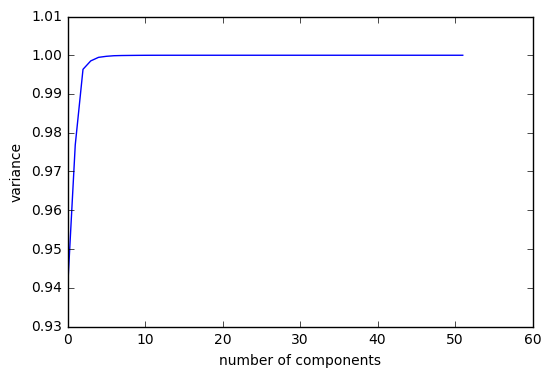

In [11]:
from sklearn.decomposition import PCA
pca=PCA().fit(x_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance")
plt.show()


In [119]:
pca=PCA(n_components=5)
x_pca=pca.fit_transform(x_df)
x_pca

array([[-1403.35005891,    70.14091523, -1078.42492334,    71.07361064,
          105.17401181],
       [-1518.19296095,    24.38234516,  -584.63665113,   151.6492701 ,
          122.57763524],
       [-1620.40782624,   -75.573837  ,   288.86368747,    20.87305961,
          -63.72261221],
       ..., 
       [-1398.92385161,   -54.74747953,  -433.79676472,   -75.33341346,
            8.36819284],
       [ 2181.44166856,  -908.00519956,  -263.32172215,   -61.08337655,
          -83.70085397],
       [-1329.46514104,    57.54053375,  -497.93836616,    29.28824026,
           30.79820622]])

In [13]:
y_df=df_out
y_df.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [14]:
y_final=y_df.drop('Molecule', axis=1)
y_final.head()


,Class
0,M
1,L
2,M
3,M
4,M


In [15]:
x_train_df, x_test_df, y_train_df, y_test_df=train_test_split(x_pca, y_final, test_size=0.2)
#x_train_int=table.Columns.RemoveAt(0)

In [16]:
x_scaler=StandardScaler()
clf_model=x_scaler.fit(x_train_df)
x_train_norm=clf_model.transform(x_train_df)
x_test_norm=clf_model.transform(x_test_df)
x_train_norm.shape, x_test_norm.shape

((3036, 5), (760, 5))

In [17]:
y_encoder=LabelEncoder()
y_encoded_tr=y_encoder.fit_transform(y_train_df)
y_enc_tr=np_utils.to_categorical(y_encoded_tr)
y_enc_tr.shape
y_encoded_test=y_encoder.fit_transform(y_test_df)
y_enc_test=np_utils.to_categorical(y_encoded_test)
y_enc_tr.shape,y_enc_test.shape

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((3036, 3), (760, 3))

In [18]:
y_enc_tr.shape[0], y_enc_tr.shape[1]

(3036, 3)

In [19]:
y_scaler=StandardScaler()
y_scaler.fit(y_enc_tr)
y_train_norm=y_scaler.transform(y_enc_tr)
y_test_norm=y_scaler.transform(y_enc_test)
y_train_norm.shape

(3036, 3)

**NEURAL NETWORK**

In [20]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [21]:
seed=7
np.random.seed(seed)

In [22]:
def baseline_model():
    model=Sequential()
    model.add(Dense(5, input_dim=5,init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(75, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(25, init='normal', activation='relu'))
    #model.add(Dropout(0.2))   
    #model.add(Dense(12, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model

In [23]:
#fit and evaluate the model
estimators=[]
#estimators.append(('standardise',StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=200, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_train_norm, y_train_norm, cv=kfold)
print('accuracy:', results.mean()*100)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="normal", input_dim=5)`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="normal", activation="sigmoid")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="normal", input_dim=5)`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", acti

accuracy: 41.3021104917


In [24]:
x_train_norm.shape, x_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((3036, 5), (760, 5), (3036, 3), (760, 3))

In [25]:
y_train_final, y_test_final=train_test_split(y_final, test_size=0.2)
y_train_final.shape

(3036, 1)

In [26]:
from sklearn import linear_model
clf_linear=linear_model.LogisticRegression()
model_linear=clf_linear.fit(x_train_norm, y_train_final)
acc_logit=model_linear.score(x_test_norm, y_test_final)
print('accuracy:',acc_logit)

accuracy: 0.518421052632


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
#calculation of the confusion matrix for Logistic
clf_logit_predict=clf_linear.predict(x_test_norm)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_final, clf_logit_predict)

cmatrix_logit=confusion_matrix(y_test_final, clf_logit_predict)
cmatrix_logit.diagonal()/cmatrix_logit.sum(axis=1)

array([ 0.,  0.,  1.])

In [28]:
tree_c=DecisionTreeClassifier(random_state=seed)#check this
model_c=tree_c.fit(x_train_norm, y_train_final)
acc_clf=model_c.score(x_test_norm, y_test_final)
print('accuracy:', acc_clf )

accuracy: 0.438157894737


In [29]:
export_graphviz(tree_c, out_file='tree_clf.dot', rounded=True)#visualizing the decision tree

In [30]:
clf_SGD=linear_model.SGDClassifier(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
clf_SGD.fit(x_train_norm, y_train_final)
y_predict_SGD=clf_SGD.predict(x_test_norm)
acc_SGD=clf_SGD.score(x_test_norm, y_test_final)
print('accuracy of SGD:', acc_SGD)

accuracy of SGD: 0.498684210526


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.svm import SVC
clf_svc=SVC(kernel='rbf', C=1e3)
clf_svc.fit(x_train_norm, y_train_final)
y_predict_svc=clf_svc.predict(x_test_norm)
acc_svc=clf_svc.score(x_test_norm, y_test_final)
print("accuracy of svc:", acc_svc)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of svc: 0.5


In [32]:
rf=RandomForestClassifier(n_estimators=70)
rf.fit(x_train_norm, y_train_final)
rf_predict_norm=rf.predict(x_test_norm)
acc_rf=rf.score(x_test_norm, y_test_final)
print('accuracy of randomforest:', acc_rf)
print('order of classes', rf.classes_)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


accuracy of randomforest: 0.455263157895
order of classes ['H' 'L' 'M']


In [33]:
#calculating the confusion matrix
confusion_matrix(y_test_final, rf_predict_norm)

array([[ 66,   3, 220],
       [ 16,   1,  60],
       [108,   7, 279]])

In [34]:
cmatrix_rf=confusion_matrix(y_test_final, rf_predict_norm)
cmatrix_rf.diagonal()/cmatrix_rf.sum(axis=1)

array([ 0.2283737 ,  0.01298701,  0.70812183])

**Binary class modelling**

In [35]:
#list(df_dragon), list(df_out)

In [36]:
df_dragon_mrg=pd.merge(df_quick, df_out)

In [37]:
#df_dragon_mrg

In [38]:
#HM model
a=df_dragon_mrg[df_out['Class']=='H']
b=df_dragon_mrg[df_out['Class']=='M']
frames_hm=[a, b]
HM=pd.concat(frames_hm)

In [39]:
#list(HM)

In [40]:
#ML model
c=df_dragon_mrg[df_out['Class']=='M']
d=df_dragon_mrg[df_out['Class']=='L']
frames_ml=[c,d]
ML=pd.concat(frames_ml)

In [41]:
ML.shape

(2406, 53)

In [42]:
x_ML=ML.values[:, 1:51]
x_ML

array([[5, 0, 0, ..., 0, 9, 0],
       [0, 2, 0, ..., 7, 38, 1],
       [0, 2, 0, ..., 8, 39, 1],
       ..., 
       [19, 1, 1, ..., 4, 72, 2],
       [0, 0, 0, ..., 4, 19, 0],
       [0, 1, 0, ..., 4, 24, 0]], dtype=object)

In [43]:
y_ML=ML.values[:, 52]
y_ML

array(['M', 'M', 'M', ..., 'L', 'L', 'L'], dtype=object)

In [44]:
ML_x_train, ML_x_test, ML_y_train, ML_y_test = train_test_split(x_ML, y_ML, test_size=0.2)

In [45]:
#HL model
e=df_dragon_mrg[df_out['Class']=='H']
f=df_dragon_mrg[df_out['Class']=='L']
frames_hl=[e,f]
HL=pd.concat(frames_hl)
#HL

In [46]:
HL.shape

(1767, 53)

In [47]:
x_HL=HL.values[:,1:51]
y_HL=HL.values[:, 52]


In [48]:
HL_x_train, HL_x_test, HL_y_train, HL_y_test=train_test_split(x_HL, y_HL, test_size=0.2)

In [49]:
x_HM=HM.values[:, 1:51].astype('float32')
print(x_HM)

[[  2.   0.   0. ...,   0.  11.   0.]
 [  0.   0.   0. ...,   0.  11.   0.]
 [  1.   1.   0. ...,   9.  41.   0.]
 ..., 
 [  0.   0.   0. ...,   7.  23.   0.]
 [  0.   1.   0. ...,   5.  28.   0.]
 [  0.   1.   0. ...,   2.  21.   0.]]


In [50]:
y_HM=HM.values[:, 52]
y_HM

array(['H', 'H', 'H', ..., 'M', 'M', 'M'], dtype=object)

In [51]:
HM_x_train, HM_x_test, HM_y_train, HM_y_test=train_test_split(x_HM,y_HM, test_size=0.2)

In [52]:
HM_y_test.shape

(684,)

** Decision tree model for HM class**

In [53]:
tree_hm=DecisionTreeClassifier(min_weight_fraction_leaf=0.13, max_leaf_nodes=12)
tree_hm.fit(HM_x_train, HM_y_train)
acc_hm=tree_hm.score(HM_x_test, HM_y_test)
tree_hm_predict=tree_hm.predict(HM_x_test)

#matthews correlation coefficient
matt_tree_hm=matthews_corrcoef(HM_y_test, tree_hm_predict)

print(tree_hm.classes_)
print(tree_hm.predict_proba(HM_x_test))
print('accuracy for HM model:',acc_hm)
print('mcc for the CART for HM:', matt_tree_hm)
#mcc of the literature value for only the CART model is 0.55

['H' 'M']
[[ 0.0848329   0.9151671 ]
 [ 0.0848329   0.9151671 ]
 [ 0.88282504  0.11717496]
 ..., 
 [ 0.0848329   0.9151671 ]
 [ 0.34624697  0.65375303]
 [ 0.88282504  0.11717496]]
accuracy for HM model: 0.880116959064
mcc for the CART for HM: 0.743578882513


In [54]:
z=tree_hm.predict_proba(HM_x_test)
z[:,0].mean(), z[:,1].mean()

(0.37390871055829272, 0.62609128944170733)

In [55]:
#computing the confusion matrix for tree in HM
confusion_matrix(HM_y_test, tree_hm_predict)

array([[206,  55],
       [ 27, 396]])

In [58]:
cmatrix_tree_hm=confusion_matrix(HM_y_test, tree_hm_predict)
cmatrix_tree_hm.diagonal()/cmatrix_tree_hm.sum(axis=1)
#LITERATURE VALUE OF THE CONSENSUS MODEL
#H:0.78
#M:0.80

array([ 0.78927203,  0.93617021])

In [61]:
#plotting the receiver operating characteristic curve
from sklearn.preprocessing import label_binarize
fpr=dict()
tpr=dict()
roc_auc=dict()
HM_y_test_col=HM_y_test[:,None]
tree_hm_predict_col=tree_hm_predict[:,None]
#y_tree_ml=tree_hm.fit(HM_x_train, HM_y_train)
for i in range(0,1):
    fpr[i], tpr[i], _=roc_curve(label_binarize(HM_y_test_col[:,i], classes=['H', 'M']),
                                label_binarize(tree_hm_predict_col[:,i], classes=['H','M']))
    roc_auc[i]=auc(fpr[i], tpr[i])

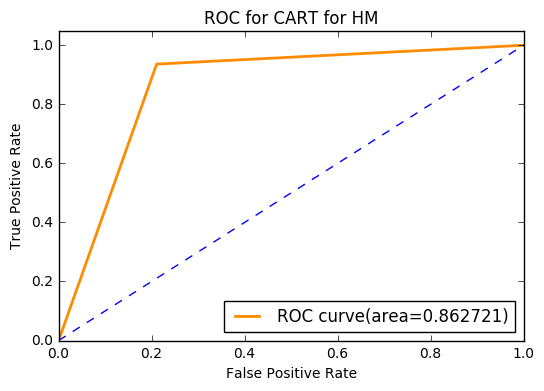

In [62]:
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve(area=%f)' % roc_auc[0])
plt.plot([0,1.0], [0, 1.0], color='blue', linestyle='--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for CART for HM')
plt.legend(loc='lower right')

plt.show()

**Chiad tree model**

In [63]:
from CHAID import Tree

#CHAID input parameters
indep_variable_cols=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW']
dep_variable=["Class"]

In [64]:
#zip(indep_variable_cols,['nominal']*3)

In [65]:
#tree from pandas
tree_chaid= Tree.from_pandas_df(HM, dict(zip(indep_variable_cols, ['nominal']*3)), dep_variable, 
                          max_depth=4, min_parent_node_size=80, min_child_node_size=35)
#tree.to_tree

**Random Forest classifier for HM**

In [66]:
RF_hm=RandomForestClassifier(n_estimators=95, random_state=1)
RF_hm.fit(HM_x_train, HM_y_train)
RF_hm_predict= RF_hm.predict(HM_x_test)
acc_RF_HM=RF_hm.score(HM_x_test, HM_y_test)

print(RF_hm.classes_)
print(RF_hm.predict_proba(HM_x_test))
print('accuracy of Random forest for HM model is:', acc_RF_HM)


#matthews correlation coefficient
matt_corr_HM=matthews_corrcoef(HM_y_test, RF_hm_predict)
print('mcc:',matt_corr_HM)

RF_hm.get_params

#MCC OF THE LITERATURE VALUE FOR THE HM RF IS 0.57

['H' 'M']
[[ 0.          1.        ]
 [ 0.10526316  0.89473684]
 [ 1.          0.        ]
 ..., 
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]]
accuracy of Random forest for HM model is: 0.941520467836
mcc: 0.875831383053


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=95, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)>

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(HM_y_test, RF_hm_predict)

array([[232,  29],
       [ 11, 412]])

In [68]:
cmatrix_rf_hm=confusion_matrix(HM_y_test, RF_hm_predict)
cmatrix_rf_hm.diagonal()/cmatrix_rf_hm.sum(axis=1)
#LITERATURE VALUE FOR consensus model
#H:0.78
#M:0.80

array([ 0.88888889,  0.97399527])

In [69]:
#RF_hm_predict, HM_y_test

In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y=label_binarize(y_HM, classes=['H', 'M'])
n_classes=y.shape[1]
#roc
fpr=dict()
tpr=dict()
roc_auc=dict()
HM_y_test_col=HM_y_test[:, None]
RF_hm_predict_col=RF_hm_predict[:,None]
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(label_binarize(HM_y_test_col[:,i], classes=['H','M']), 
                                 label_binarize(RF_hm_predict_col[:,i], classes=['H','M']))
    roc_auc[i]= auc(fpr[i], tpr[i])
    

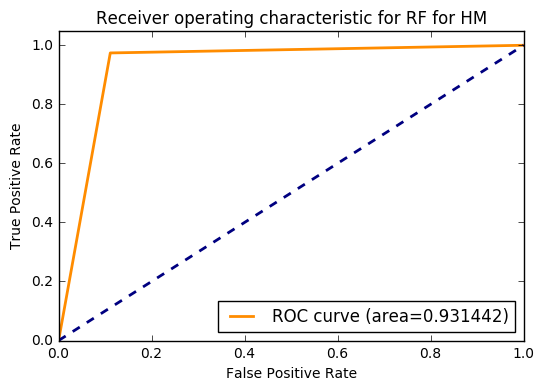

In [71]:
#plotting the ROC curve
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area=%f)' % roc_auc[0])
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RF for HM')
plt.legend(loc="lower right")
plt.show()


In [72]:
#calculation of confustion matrix
confusion_matrix(y_predict_svc, y_test_final)

array([[ 22,   8,  34],
       [  5,   1,   3],
       [262,  68, 357]])

In [73]:
RF_hm_predict_col.shape

(684, 1)

In [100]:
RF_hm_predict

array(['M', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'H', 'H', 'M',
       'M', 'M', 'M', 'M', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'M', 'M',
       'H', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'H',
       'M', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'H', 'M',
       'H', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'M',
       'H', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'H', 'H', 'M', 'M',
       'H', 'M', 'H', 'H', 'H', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H',
       'H', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'H',
       'H', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'H', 'M',
       'M', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'M', 'M', 'M', 'H', 'M', 'H', 'M', 'M', 'H', 'M', 'H', 'H',
       'H', 'H', 'H', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'H', 'M

In [102]:
Vote1=RF_hm_predict

In [103]:
tree_hm_predict

array(['M', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'H', 'H', 'M',
       'M', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'H', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'H',
       'M', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'M', 'H', 'M',
       'H', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'H', 'M', 'M',
       'H', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'H', 'H', 'M', 'M',
       'H', 'H', 'H', 'H', 'H', 'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H',
       'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M', 'H', 'H', 'M', 'M', 'M',
       'M', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M', 'M', 'H', 'M', 'H',
       'H', 'M', 'M', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'M', 'H', 'M',
       'H', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'H', 'H', 'H',
       'M', 'H', 'M', 'M', 'M', 'M', 'H', 'M', 'M', 'H', 'M', 'H', 'H',
       'H', 'H', 'M', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'H', 'M

In [104]:
Vote2=tree_hm_predict

In [112]:
#voting for a binary model
consensus=[]
for i in range(0, 684):
    if Vote1[i]==Vote2[i]:
        consensus.append(Vote1[i])
    else:
        consensus.append('NC')
        

In [114]:
consensus

['M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'H',
 'H',
 'H',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'NC',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'M',
 'H',
 'M',
 'H',
 'M',
 'H',
 'M',
 'H',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'H',
 'M',
 'M',
 'H',
 'M',
 'H',
 'M',
 'H',
 'M',
 'NC',
 'M',
 'H',
 'M',
 'H',
 'M',
 'H',
 'M',
 'M',
 'H',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'M',
 'M',
 'H',
 'NC',
 'H',
 'H',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'NC',
 'M',
 'NC',
 'M',
 'M',
 'NC',
 'NC',
 'M',
 'NC',
 'NC',
 'M',
 'M',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'H',
 'M',
 'M',
 'NC',
 'H',
 'M',
 'H',
 'H',
 'M',
 'M',
 'NC',
 'M',
 'M',
 'M',
 'NC',
 'M',
 'M',
 'M',
 'H',
 'M',
 'NC',
 'M',
 'M',
 'M',
 'M',
 'NC',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'H',
 'M',
 'NC',
 'M',
 'M',
 'NC',
 'M',
 'H',
 'M',


**NN FOR CLASSIFICATION**

In [74]:
#one hot encoding
y_encoder=LabelEncoder()
y_encoded_tr_HM=y_encoder.fit_transform(HM_y_train)
y_en_tr_HM=np_utils.to_categorical(y_encoded_tr_HM)
y_en_tr_HM.shape
y_encoded_test_HM=y_encoder.fit_transform(HM_y_test)
y_en_test_HM=np_utils.to_categorical(y_encoded_test_HM)
y_en_test_HM.shape, y_en_tr_HM.shape

((684, 2), (2735, 2))

In [75]:
y_scaler=StandardScaler()
y_scaler.fit(y_en_tr_HM)
HM_y_train_norm=y_scaler.transform(y_en_tr_HM)
HM_y_test_norm=y_scaler.transform(y_en_test_HM)
HM_y_train_norm.shape, HM_y_test_norm.shape

((2735, 2), (684, 2))

In [76]:
HM_x_train.shape, HM_x_test.shape

((2735, 50), (684, 50))

In [77]:
x_scaler=StandardScaler()
x_scaler.fit(HM_x_train)
HM_x_train_norm=x_scaler.transform(HM_x_train)
HM_x_test_norm=x_scaler.transform(HM_x_test)
HM_x_train_norm.shape

(2735, 50)

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold

In [79]:
def baseline_model():
    model=Sequential()
    model.add(Dense(51, input_dim=51, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(26, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(13, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [80]:
#fit and evaluate the model
estimators=[]
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=20, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, HM_x_train_norm, HM_y_train_norm, cv=kfold)
print('accuracy:', results.mean()*100)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(51, activation="relu", kernel_initializer="normal", input_dim=51)`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda

ValueError: Error when checking input: expected dense_31_input to have shape (None, 51) but got array with shape (2461, 50)

**Decision tree classifier for ML**

In [81]:
tree_ml=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_ml.fit(ML_x_train, ML_y_train)
acc_tree_ml=tree_ml.score(ML_x_test, ML_y_test)
prob_tree_ml=tree_ml.predict_proba(ML_x_test)
predict_tree_ml=tree_ml.predict(ML_x_test)

print('order of classes:',tree_ml.classes_)
print(tree_ml.get_params)
print('accuracy for the CT for ML model:', acc_tree_ml)
print('probability predictions for ML model:', prob_tree_ml)

#matthews correlation coefficient
mat_corr_ML=matthews_corrcoef(ML_y_test, predict_tree_ml)
print('matthews correlation coeff:',mat_corr_ML)

#len(acc_tree_ml),len(ML_x_test)

order of classes: ['L' 'M']
<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>
accuracy for the CT for ML model: 0.94398340249
probability predictions for ML model: [[ 0.          1.        ]
 [ 0.03875969  0.96124031]
 [ 0.          1.        ]
 [ 0.03875969  0.96124031]
 [ 0.          1.        ]
 [ 0.03875969  0.96124031]
 [ 0.93277311  0.06722689]
 [ 0.8556701   0.1443299 ]
 [ 0.36        0.64      ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.14285714  0.85714286]
 [ 0.8556701   0.1443299 ]
 [ 0.          1.        ]
 [ 0.25490196  0.74509804]
 [ 0.          1.  

In [82]:
#computing the confusion matrix
confusion_matrix(ML_y_test, predict_tree_ml)

array([[ 54,  22],
       [  5, 401]])

In [83]:
#computing the accuracies of the predictions of the individual classes
cmatrix_ML_tree=confusion_matrix(ML_y_test, predict_tree_ml)
cmatrix_ML_tree.diagonal()/cmatrix_ML_tree.sum(axis=1)
#literature values of L and M class respectively, ONLY FOR CART MODELS
#L:0.83
#M:0.70
#literature values of L and M on the consensus system
#L:0.79
#M:0.84

array([ 0.71052632,  0.98768473])

**Random Forest Classifier for ML**

In [84]:
RF_ml=RandomForestClassifier(n_estimators=23, random_state=2)
RF_ml.fit(ML_x_train, ML_y_train)
accu_RF_ml=RF_ml.score(ML_x_test, ML_y_test)
prob_RF_ml=RF_ml.predict_proba(ML_x_test)
predict_RF_ml=RF_ml.predict(ML_x_test)
#matthews correlation coefficients
matt_coeff_ml=matthews_corrcoef(ML_y_test, predict_RF_ml)

print('order of classes:',RF_ml.classes_)
print('accuracy of model:', accu_RF_ml)
print('probabilities of the respective classes:', prob_RF_ml)
print('matthews correlation coefficient:', matt_coeff_ml )
print(RF_ml.get_params)

order of classes: ['L' 'M']
accuracy of model: 0.952282157676
probabilities of the respective classes: [[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.26086957  0.73913043]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.69565217  0.30434783]
 [ 0.          1.        ]
 [ 0.13043478  0.86956522]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.82608696  0.17391304]
 [ 0.          1.        ]
 [ 0.13043478  0.86956522]
 [ 0.          1.        ]
 [ 0.2173913   0.7826087 ]
 [ 0.69565217  0.30434783]
 [ 0.47826087  0.52173913]
 [ 0.52173913  0.47826087]
 [ 0.          1.        ]
 [ 0.17391304  0.82608696]
 [ 0.          1.        ]
 [ 0.08695652  0.91304348]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.13043478  0.86956522]
 [ 0.          1.        ]
 [ 0.2173913   0.7826087 ]
 [ 0.0

In [85]:
#computing the confusion matrix for random forest
confusion_matrix(ML_y_test, predict_RF_ml)

array([[ 62,  14],
       [  9, 397]])

In [86]:
cmatrix_rf_ml=confusion_matrix(ML_y_test, predict_RF_ml)
cmatrix_rf_ml.diagonal()/cmatrix_rf_ml.sum(axis=1)

#literature values of the consensus system for L and M classes respectively
#L:0.79
#M:0.84

array([ 0.81578947,  0.97783251])

**Decision Tree for the LH model**

In [87]:
tree_LH=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_LH.fit(HL_x_train, HL_y_train)
acc_tree_LH=tree_LH.score(HL_x_test, HL_y_test)
predict_tree_LH=tree_LH.predict(HL_x_test)
prob_tree_LH=tree_LH.predict_proba(HL_x_test)
#matthews correlation coeff
matt_corrcoef= matthews_corrcoef(HL_y_test, predict_tree_LH)
print('order of classes:', tree_LH.classes_)
print("accuracy of the model", acc_tree_LH)
print('probabilities of the classes:', prob_tree_LH)
print('prediction of classes:', predict_tree_LH)
print('matthews correlation coeff:', matt_corrcoef)

tree_LH.get_params

order of classes: ['H' 'L']
accuracy of the model 0.937853107345
probabilities of the classes: [[ 0.01408451  0.98591549]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.5915493   0.4084507 ]
 [ 0.10588235  0.89411765]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.5915493   0.4084507 ]
 [ 1.          0.        ]
 [ 0.98591549  0.01408451]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.79487179  0.20512821]
 [ 1.          0.        ]
 [ 0.84210526  0.15789474]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.01408451 

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>

In [88]:
#computing the confusion matrix
confusion_matrix(HL_y_test, predict_tree_LH)

array([[276,   5],
       [ 17,  56]])

In [89]:
cmatrix_HL_tree=confusion_matrix(HL_y_test, predict_tree_LH)
cmatrix_HL_tree.diagonal()/cmatrix_HL_tree.sum(axis=1)

array([ 0.98220641,  0.76712329])

**Random Forest for LH model**

In [90]:
RF_LH=RandomForestClassifier(n_estimators=47, random_state=3)
RF_LH.fit(HL_x_train, HL_y_train)
acc_RF_HL=RF_LH.score(HL_x_test, HL_y_test)
predict_RF_HL=RF_LH.predict(HL_x_test)
prob_RF_HL=RF_LH.predict_proba(HL_x_test)
#matthews correlation coefficient
matt_corrcoeff_lh=matthews_corrcoef(HL_y_test, predict_RF_HL)

print('order of classes:', RF_LH.classes_)
print('accuracy of model:', acc_RF_HL)
print('probabilities of the respective classes:', prob_RF_HL)
print('predictions of the model:', predict_RF_HL )
print('matthews correlation coefficient:', matt_corrcoeff_lh)

order of classes: ['H' 'L']
accuracy of model: 0.957627118644
probabilities of the respective classes: [[ 0.08510638  0.91489362]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.85106383  0.14893617]
 [ 0.0212766   0.9787234 ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.5106383   0.4893617 ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.89361702  0.10638298]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.95744681  0.04255319]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.95744681  0.04255319]
 [ 0.89361702  0.10638298]
 [ 1.          0.        ]
 [ 0.93617021  0.06382979]
 [ 0.          1.        ]
 [ 0. 

In [91]:
#computing the confusion matrix for HL rf
confusion_matrix(HL_y_test, predict_RF_HL)

array([[276,   5],
       [ 10,  63]])

In [92]:
cmatrix_rf_HL=confusion_matrix(HL_y_test, predict_RF_HL)
cmatrix_rf_HL.diagonal()/cmatrix_rf_HL.sum(axis=1)

#LITERATURE VALUE FOR THE LH MODEL FOR ONLY RF
#H:0.95
#L:0.93

array([ 0.98220641,  0.8630137 ])

**BUILDING A CLASSIFICATION MODEL IN TENSORFLOW FOR LH model**

In [93]:
import tensorflow as tf

In [94]:
training_set, test_set=train_test_split(HL, test_size=0.2)
training_set.shape, test_set.shape

((1413, 53), (354, 53))

In [95]:
COLUMNS=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW','Class']
FEATURES=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW']
LABEL=['Class']


In [96]:
feature_cols=[tf.feature_column.numeric_column(k) for k in FEATURES]
feature_cols

[_NumericColumn(key='Molecule', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.stars', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.amine', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.amidine', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.acid', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.amide', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.rotor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_.rtvFG', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikProp_CNS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='QikPro

In [97]:
def get_input_fn(data_set, num_epochs=None, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(x=pd.DataFrame({j:data_set[j] for j in FEATURES}),
                                              y=pd.Series(data_set[LABEL].values),
                                              num_epochs=num_epochs, shuffle=shuffle)

In [98]:
Classifier=tf.estimator.DNNClassifier(feature_columns=feature_cols, hidden_units=[51,51,30,20,10], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\saiva\\AppData\\Local\\Temp\\tmp1r8pjc7o', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_session_config': None}


In [99]:
Classifier.train(input_fn=get_input_fn(ML), steps=1000)

Exception: Data must be 1-dimensional